In [1]:
import numpy as np
import maze as mz 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]

])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [3]:
env = mz.Maze(maze)

States  {0: ((0, 0), (0, 1)), 1: ((0, 0), (0, 2)), 2: ((0, 0), (0, 3)), 3: ((0, 0), (0, 4)), 4: ((0, 0), (0, 5)), 5: ((0, 0), (0, 6)), 6: ((0, 0), (1, 0)), 7: ((0, 0), (1, 1)), 8: ((0, 0), (1, 2)), 9: ((0, 0), (1, 3)), 10: ((0, 0), (1, 4)), 11: ((0, 0), (1, 5)), 12: ((0, 0), (1, 6)), 13: ((0, 0), (2, 0)), 14: ((0, 0), (2, 1)), 15: ((0, 0), (2, 2)), 16: ((0, 0), (2, 3)), 17: ((0, 0), (2, 4)), 18: ((0, 0), (2, 5)), 19: ((0, 0), (2, 6)), 20: ((0, 0), (3, 0)), 21: ((0, 0), (3, 1)), 22: ((0, 0), (3, 2)), 23: ((0, 0), (3, 3)), 24: ((0, 0), (3, 4)), 25: ((0, 0), (3, 5)), 26: ((0, 0), (3, 6)), 27: ((0, 0), (4, 0)), 28: ((0, 0), (4, 1)), 29: ((0, 0), (4, 2)), 30: ((0, 0), (4, 3)), 31: ((0, 0), (4, 4)), 32: ((0, 0), (4, 5)), 33: ((0, 0), (4, 6)), 34: ((0, 0), (5, 0)), 35: ((0, 0), (5, 1)), 36: ((0, 0), (5, 2)), 37: ((0, 0), (5, 3)), 38: ((0, 0), (5, 4)), 39: ((0, 0), (5, 5)), 40: ((0, 0), (5, 6)), 41: ((0, 0), (6, 0)), 42: ((0, 0), (6, 1)), 43: ((0, 0), (6, 2)), 44: ((0, 0), (6, 3)), 45: ((0, 0)

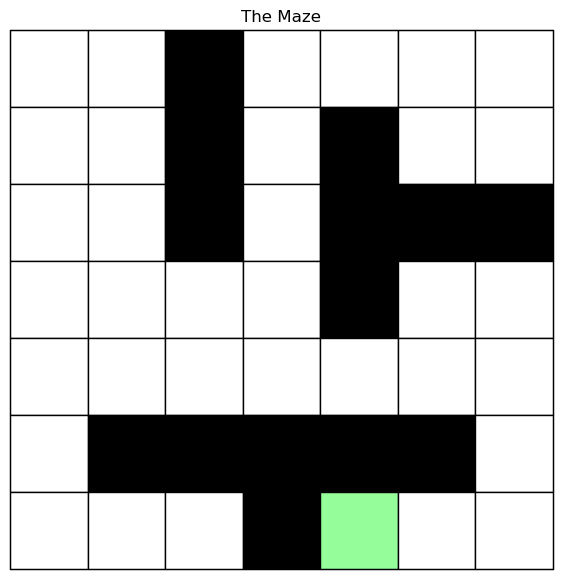

In [4]:
mz.draw_maze(maze)

In [5]:
# Finite horizon
horizon = 15
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming_minotaur(env,horizon);

In [6]:
policy[34,horizon]

0.0

0

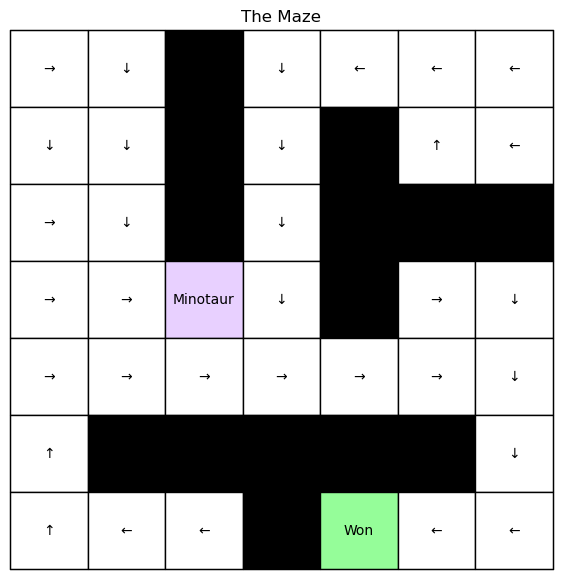

In [7]:
minotaur = (3,2)
time = 4
mz.draw_policy(env, minotaur, policy, time)

In [8]:
print(policy[:, horizon])

[0. 0. 0. ... 0. 0. 0.]


## Dynamic Programming

In [9]:

# Simulate the shortest path starting from position (0,0) and using Dynamic Programming
method = 'DynProg';
start  = (0,0);
minotaur_start= (6,4);
path, minotaur_path, lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);

if(lost):
  print('lost');
else:
  print('won')

won


In [10]:
print(path)

[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 6), (6, 5), (6, 4)]


In [11]:
print(minotaur_path)

[(6, 4), (6, 3), (6, 2), (6, 1), (5, 1), (6, 1), (6, 2), (6, 3), (5, 3), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (5, 5), (6, 5)]


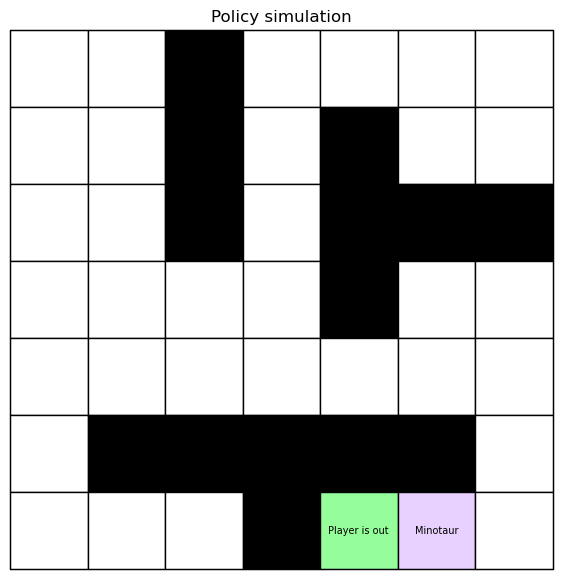

In [12]:
# Show the shortest path 
mz.animate_solution(maze, path, minotaur_path)

In [13]:
def get_probability(start,minotaur_start, policy,method, epochs):
  tot_count = 0
  win_count= 0

  for i in range(epochs):
    _, _, lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);
  
    tot_count+=1;
    if(won):
      win_count +=1;
    
  return win_count/tot_count

In [14]:
get_probability(start,minotaur_start, policy,method, 10000)

0.7338

In [15]:
probabilities = []
horizon_list = []
for i in range(30):
  time = i+1
  horizon_list.append(time)
  # Solve the MDP problem with dynamic programming 
  V, policy= mz.dynamic_programming_minotaur(env,time);

  probabilities.append(get_probability(start,minotaur_start, policy,method, 10000))

print(probabilities)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08, 0.7286, 0.7408, 0.7426, 0.7329, 0.7433, 0.7486, 0.7596, 0.7489, 0.7427, 0.7525, 0.7505, 0.7505, 0.7469, 0.7542, 0.7637, 0.7587]


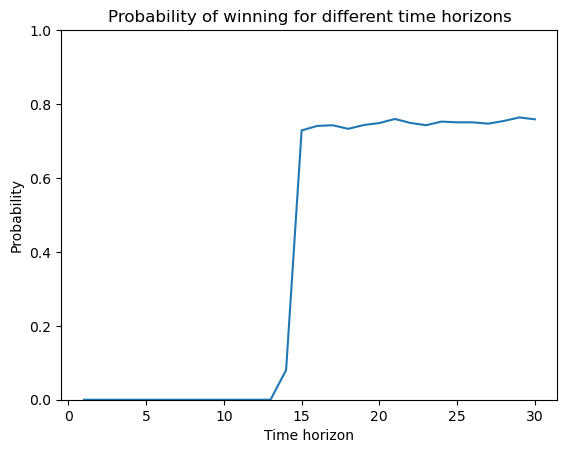

In [22]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = horizon_list
# corresponding y axis values 
y = probabilities
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Time horizon') 
# naming the y axis 
plt.ylabel('Probability')
  
# giving a title to my graph 
plt.title('Probability of winning for different time horizons')

# Set the range of x-axis
plt.ylim(0, 1)
  
# function to show the plot 
plt.show() 

## Value Iteration

Life geometrically distributed with mean 30. 1/t = 30 => 

In [17]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration_minotaur(env, gamma, epsilon)

In [18]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0);
minotaur_start= (5,5);
path, minotaur_path,lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);
if(lost):
  print('lost');
else:
  print('won')

won


In [19]:
print(path)
print(minotaur_path)

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4)]
[(5, 5), (4, 5), (4, 4), (4, 3), (4, 2), (4, 3), (5, 3), (5, 4), (5, 3), (4, 3), (3, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 2)]


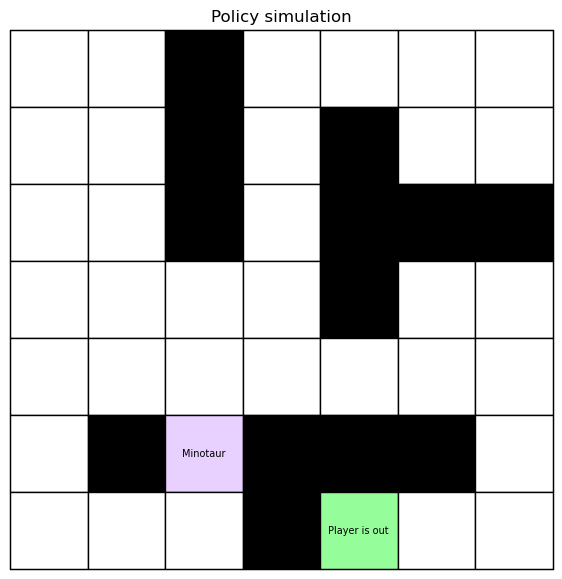

In [20]:
mz.animate_solution(maze, path, minotaur_path)